In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sklearn as sk
from datetime import datetime
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

C:\Users\shashwat\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# PART 1

### Exercise 1

In [6]:
# reading data files
data_h1 = pd.read_csv('H1.csv')
data_h2 = pd.read_csv('H2.csv')

In [7]:
data_h1.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0       342             2015             July   
1           0       737             2015             July   
2           0         7             2015             July   
3           0        13             2015             July   
4           0        14             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     0   
4                     27                      1                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                  0       2         0  ...  No Deposit              NULL   
1                  0       2         0  ...  No Deposit              NULL   
2                  1       1         0  ...  No Deposit              NULL   
3                  1       1         0  ...  No Deposit               304   
4                  2       2         0  ...  No Deposit               240   

       Company DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0         NULL                 0    Transient   0.0                         0   
1         NULL                 0    Transient   0.0                         0   
2         NULL                 0    Transient  75.0                         0   
3         NULL                 0    Transient  75.0                         0   
4         NULL                 0    Transient  98.0                         0   

   TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
0                       0         Check-Out            2015-07-01  
1                       0         Check-Out            2015-07-01  
2                       0         Check-Out            2015-07-02  
3                       0         Check-Out            2015-07-02  
4                       1         Check-Out            2015-07-03  

[5 rows x 31 columns]

In [8]:
data_h2.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                  2       1       0.0  ...  No Deposit                 6   
1                  4       2       0.0  ...  No Deposit                 9   
2                  4       1       0.0  ...  No Deposit                 9   
3                  4       2       0.0  ...  No Deposit                 9   
4                  2       2       0.0  ...  No Deposit                 9   

       Company DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0         NULL                 0    Transient   0.0                         0   
1         NULL                 0    Transient  76.5                         0   
2         NULL                 0    Transient  68.0                         0   
3         NULL                 0    Transient  76.5                         0   
4         NULL                 0    Transient  76.5                         0   

   TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
0                       0         Check-Out            2015-07-03  
1                       1          Canceled            2015-07-01  
2                       1          Canceled            2015-04-30  
3                       2          Canceled            2015-06-23  
4                       1          Canceled            2015-04-02  

[5 rows x 31 columns]

In [9]:
print("Columns in `h1`:", len(data_h1.columns))
print("Columns in `h2`:", len(data_h2.columns))

Columns in `h1`: 31
Columns in `h2`: 31


In [10]:
data_inter = data_h1.columns.intersection(data_h2.columns)
print("No. of intersecting columns:", len(data_inter))

No. of intersecting columns: 31


In [11]:
# combing the datasets together
data_h12 = pd.concat([data_h1, data_h2], axis=0)

In [12]:
# shape of the data
print("Shape of the concatenated data:", data_h12.shape)

Shape of the concatenated data: (119390, 31)


### Exercise 2

In [13]:
data_h12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 79329
Data columns (total 31 columns):
IsCanceled                     119390 non-null int64
LeadTime                       119390 non-null int64
ArrivalDateYear                119390 non-null int64
ArrivalDateMonth               119390 non-null object
ArrivalDateWeekNumber          119390 non-null int64
ArrivalDateDayOfMonth          119390 non-null int64
StaysInWeekendNights           119390 non-null int64
StaysInWeekNights              119390 non-null int64
Adults                         119390 non-null int64
Children                       119386 non-null float64
Babies                         119390 non-null int64
Meal                           119390 non-null object
Country                        118902 non-null object
MarketSegment                  119390 non-null object
DistributionChannel            119390 non-null object
IsRepeatedGuest                119390 non-null int64
PreviousCancellations          1193

### Exercise 3

#### Cleaning column `Company`

In [14]:
data_h12.Company.unique()[:20]

array(['       NULL', '        110', '        113', '        270',
       '        178', '        240', '        154', '        144',
       '        307', '        268', '         59', '        204',
       '        312', '        318', '         94', '        174',
       '        274', '        195', '        223', '        317'],
      dtype=object)

In [15]:
def clean_company(x):
    try:
        return 'company_'+x.split()[0]
    except:
        return 'company_unknown'

In [16]:
# converting into categorical values
data_h12['Company'] = data_h12['Company'].apply(clean_company)

data_h12['Company'].unique()[:20]

array(['company_NULL', 'company_110', 'company_113', 'company_270',
       'company_178', 'company_240', 'company_154', 'company_144',
       'company_307', 'company_268', 'company_59', 'company_204',
       'company_312', 'company_318', 'company_94', 'company_174',
       'company_274', 'company_195', 'company_223', 'company_317'],
      dtype=object)

In [17]:
data_h12 = pd.concat([data_h12,
                      pd.get_dummies(data_h12.Company)], axis=1)

In [18]:
data_h12.drop('Company', axis=1, inplace=True)

#### Cleaning `ReservatonStatusDate`

- Extracting the Year, Month and Date from the `ReservationStatusDate` and concating it to the dataframe `data_h12` and dropping the `ReservationStatusDate`
- This datetime extraction gives us better features

In [19]:
RSD = pd.DataFrame(pd.to_datetime(data_h12.ReservationStatusDate).astype('str'))

In [20]:
def clean_RSD(x, dt='d'):
    try:
        if dt=='d':
            dt_no = 2
        elif dt=='m':
            dt_no = 1
        elif dt=='y':
            dt_no = 0
        return list(x)[0].split('-')[dt_no]
    except:
        return x.split('-')[dt_no]

In [21]:
RSD['ReservationStatusDate_year'] = RSD.ReservationStatusDate.apply(clean_RSD, args=('y')).astype(int)
RSD['ReservationStatusDate_month'] = RSD.ReservationStatusDate.apply(clean_RSD, args=('m')).astype(int)
RSD['ReservationStatusDate_day'] = RSD.ReservationStatusDate.apply(clean_RSD, args=('d')).astype(int)

In [22]:
data_h12 = pd.concat([data_h12, RSD.iloc[:, 1:]], axis=1)

In [23]:
data_h12.drop('ReservationStatusDate', axis=1, inplace=True)

#### Cleaning `ArrivalDateMonth`

- Mapping the Month Name into Month number

In [24]:
data_h12['ArrivalDateMonth'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [25]:
month_to_num = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September':'09',
    'October': '10',
    'November': '11',
    'December': '12'
}

In [26]:
data_h12['ArrivalDateMonth'] = data_h12['ArrivalDateMonth'].map(month_to_num).astype('int')

#### Cleaning `Meal`
- Label Encoding and Binarizing
- concatenating to `data_h12`
- dropping original `Meal`

In [27]:
def meal_parser(x):
    if x!='Undefined':
        return x.split(' ')[0]
    else:
        return 'Undefined'

In [28]:
meal_data = data_h12.Meal.apply(meal_parser)
meal_data = pd.get_dummies(meal_data)

In [29]:
# adding `meal_data`
data_h12 = pd.concat([data_h12, meal_data], axis=1)
# dropping `Meal`
data_h12.drop('Meal', axis=1, inplace=True)

#### Cleaning `ReservationStatus`
- Label Encoding
- Dropping ReservationStatus

In [30]:
data_h12 = pd.concat([data_h12, pd.get_dummies(data_h12.ReservationStatus)],
                    axis=1)

In [31]:
data_h12.drop('ReservationStatus', axis=1, inplace=True)

#### Cleaning `Country`

In [32]:
# one hot encoding `Country`
country_col = pd.get_dummies(data_h12.Country)

# creating column names
country_col_names = ['Country_'+str(con) for con in list(country_col.columns)]
# adding column names
country_col.columns = country_col_names

# concatenating to the main DataFrame
data_h12 = pd.concat([data_h12, country_col], axis=1)

In [33]:
data_h12.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       ...
       'Country_UMI', 'Country_URY', 'Country_USA', 'Country_UZB',
       'Country_VEN', 'Country_VGB', 'Country_VNM', 'Country_ZAF',
       'Country_ZMB', 'Country_ZWE'],
      dtype='object', length=568)

#### Cleaning `Customer Type`

In [34]:
data_h12 = pd.concat([data_h12, pd.get_dummies(data_h12.CustomerType)],
                    axis=1)
data_h12.drop('CustomerType', axis=1, inplace=True)

#### Cleaning `Distribution Channel`

In [35]:
data_h12 = pd.concat([data_h12, pd.get_dummies(data_h12.DistributionChannel)],
                    axis=1)
data_h12.drop('DistributionChannel', axis=1, inplace=True)

#### Cleaning `Market Segment`

In [36]:
data_h12 = pd.concat([data_h12, pd.get_dummies(data_h12.MarketSegment)],
                    axis=1)
data_h12.drop('MarketSegment', axis=1, inplace=True)

# PART 2

### Exercise 1

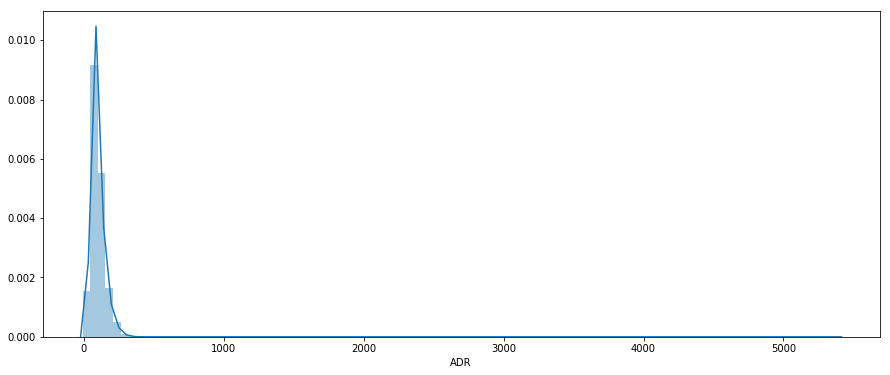

In [37]:
plt.figure(figsize=(15, 6))
# distribution plot of ADR
sns.distplot(data_h12.ADR, bins=100)

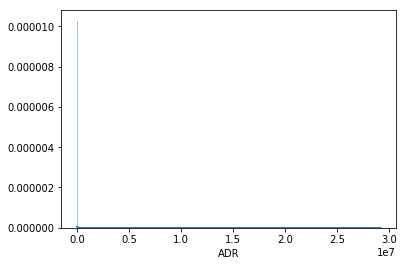

In [78]:
# The graph seems to be left skewed
# squaring the graph we can see the value is highly distributed
# around the value `0`
sns.distplot(np.square(data_h12.ADR), bins=300)

### Exercise 2

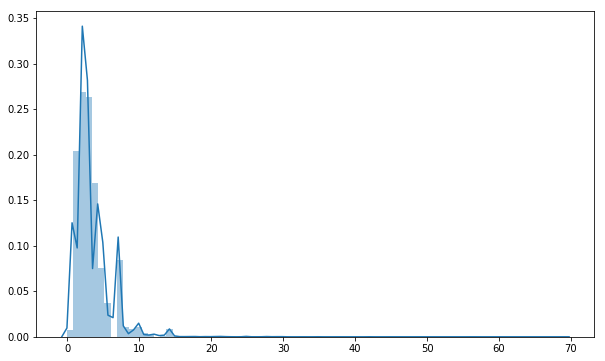

In [79]:
Stays_in_total = data_h12.StaysInWeekNights + data_h12.StaysInWeekendNights
plt.figure(figsize=(10, 6))
# plotting the dist plot of the Total number od stays
sns.distplot(Stays_in_total, bins=80)

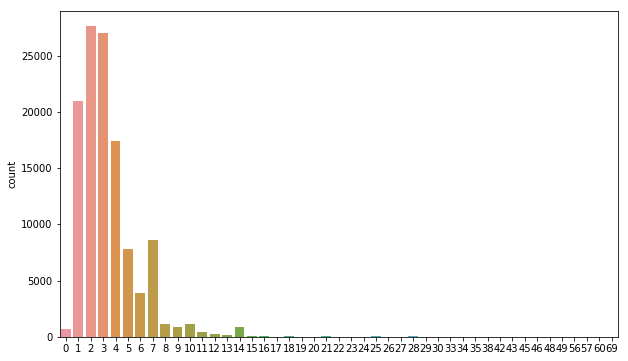

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(Stays_in_total)

##### We can clearly see that the maximum stays on average are 2-3 days and exponentially decreases as the number of days increase

### Exercise 3

In [42]:
# Count of customers from countries
country_counts = data_h12.Country.value_counts()

# Countries with highest customers
country_counts[0:5]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: Country, dtype: int64

In [43]:
country_counts[:9]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
Name: Country, dtype: int64

In [44]:
# percentage dataframe
percent_of_country_cust = country_counts/np.sum(country_counts)*100

Text(0.5, 0, 'Countries')

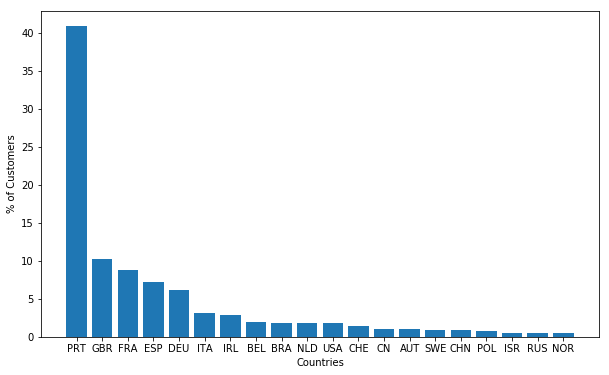

In [84]:
plt.figure(figsize=(10, 6))
# plotting the top `n` countries
n_countries = 20
plt.bar(list(percent_of_country_cust.index)[:n_countries],
        percent_of_country_cust.values[:n_countries])
plt.ylabel('% of Customers')
plt.xlabel('Countries')

**We can infer from the above that the hotels are mostly located in Europe.
Mostly in Portugal, Greate Britain, France and Spain, Denmark and Italy**

### Exercise 4


We shall use a correlation matrix to visualize the relationships between various features in the dataset.

In [85]:
all_cols = list(data_h12.columns)

In [86]:
cols_to_corr = [
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'ADR']

D:\anaconda\envs\deep-work\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda\envs\deep-work\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


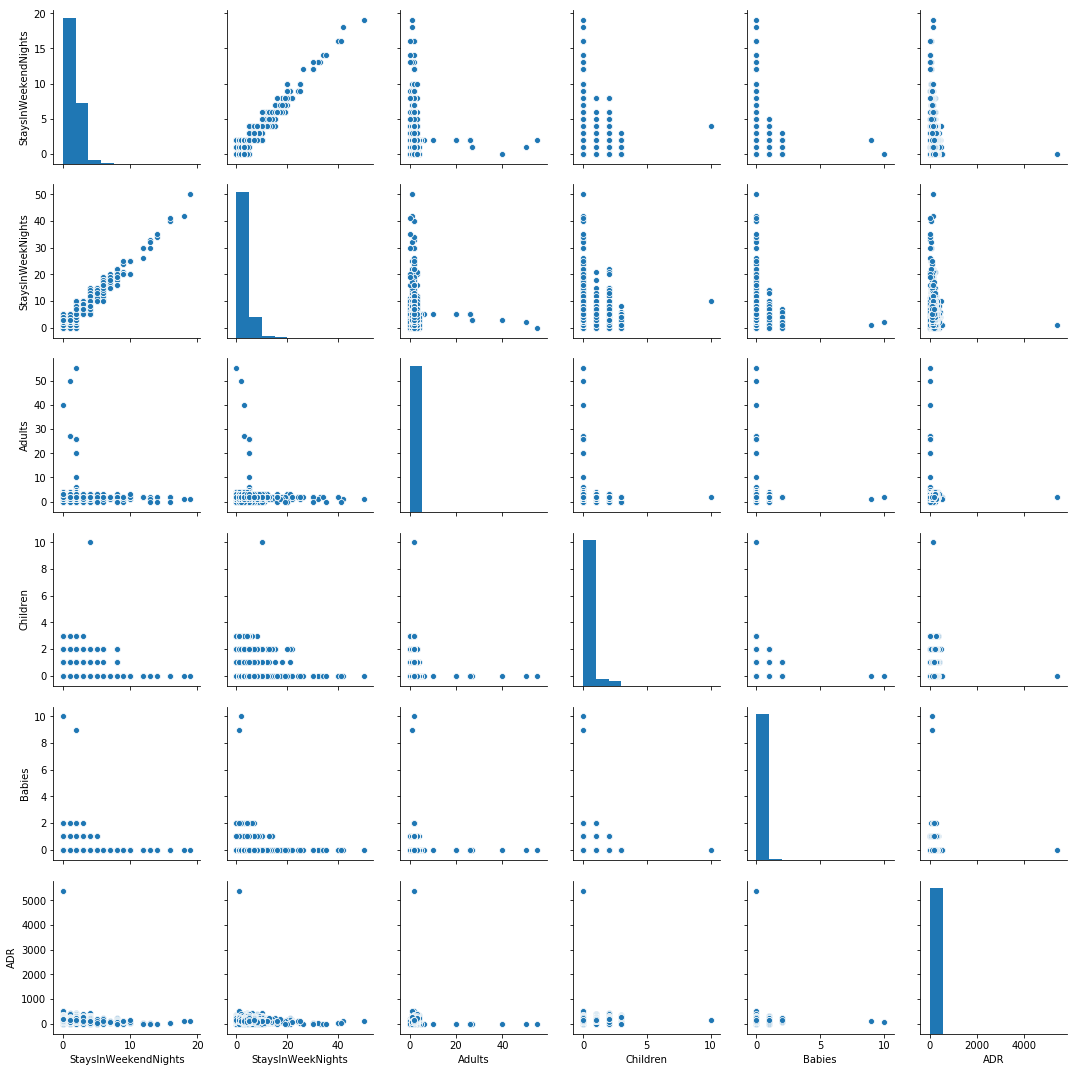

In [87]:
sns.pairplot(data_h12[cols_to_corr])

- We can infer from the above plot that `StaysinWeekNights` & `StaysinWeekendNights` are highly correlated
- Large Groups of `Adults` do not stay for more than a week on average wheas smaller groups of 1-5 book mostly between a week or a fornight.

### Exercise 5

In [88]:
col_names_corr = ['ADR','Adults',
'StaysInWeekendNights',
'StaysInWeekNights']

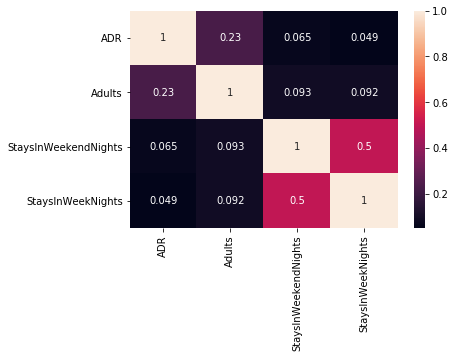

In [89]:
sns.heatmap(np.corrcoef([data_h12.ADR, data_h12.Adults,
             data_h12.StaysInWeekNights,
            data_h12.StaysInWeekendNights]), annot=True,
            yticklabels=col_names_corr,
            xticklabels=col_names_corr)

#### ADR has a correlation of 23% with Adults

# PART 3

In [63]:
drop_object_cols = ['Country',
                    'ReservedRoomType',
                    'AssignedRoomType',
                    'DepositType','Agent', 'Children']
data_h12.drop(drop_object_cols, axis=1, inplace=True)

In [64]:
# Label
y = data_h12.Canceled
# Features

X = data_h12.drop('Canceled', axis=1)
X.drop(['IsCanceled', 'Check-Out'], axis=1, inplace=True)

C:\Users\shashwat\AppData\Roaming\Python\Python35\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  --------


In [65]:
# Diving the dataset into Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Exercise 1

In [85]:
lr = LogisticRegression()
# training a linear model
lr.fit(X_train, y_train)

D:\anaconda\envs\deep-work\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
# predicting values
pred = lr.predict(X_test)

# plotting results
print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

[[17117  1843]
 [ 3684  7204]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     18960
           1       0.80      0.66      0.72     10888

   micro avg       0.81      0.81      0.81     29848
   macro avg       0.81      0.78      0.79     29848
weighted avg       0.81      0.81      0.81     29848



### Exercise 2

In [87]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

D:\anaconda\envs\deep-work\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
# predicting values
pred_rf = rf_model.predict(X_test)

# plotting results
print(confusion_matrix(y_test, pred_rf))

print(classification_report(y_test, pred_rf))

[[18671   289]
 [ 1769  9119]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     18960
           1       0.97      0.84      0.90     10888

   micro avg       0.93      0.93      0.93     29848
   macro avg       0.94      0.91      0.92     29848
weighted avg       0.93      0.93      0.93     29848



In [89]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

In [90]:
feature_importances[:9]

importance
LeadTime                       0.112342
ReservationStatusDate_month    0.095616
Country_PRT                    0.073984
ReservationStatusDate_day      0.067125
ArrivalDateWeekNumber          0.065788
ADR                            0.063606
TotalOfSpecialRequests         0.056263
ArrivalDateDayOfMonth          0.054793
ArrivalDateMonth               0.040018

### Exercise 3
##### Grid Searching Random Forest Algorithm to improve its Accuracy

In [91]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [95]:
# init model
rfc_final=RandomForestClassifier()

# init grid searching
CV_rfc = GridSearchCV(estimator=rfc_final, param_grid=param_grid,
                      cv=2, verbose=5, n_jobs=-1)

In [96]:
# begin grid search
CV_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:  6.9min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  19 out of  24 | elapsed:  9.6min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 10.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 10.3min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [97]:
CV_rfc.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 500}

In [98]:
# predicting values
pred_rf_b = CV_rfc.predict(X_test)

# plotting results
print(confusion_matrix(y_test, pred_rf_b))

print(classification_report(y_test, pred_rf_b))

[[18816   144]
 [ 1369  9519]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18960
           1       0.99      0.87      0.93     10888

   micro avg       0.95      0.95      0.95     29848
   macro avg       0.96      0.93      0.94     29848
weighted avg       0.95      0.95      0.95     29848



# PART 5

In [68]:
from feature_selector import FeatureSelector

In [69]:
fs = FeatureSelector(data=X_train, labels=y_train)

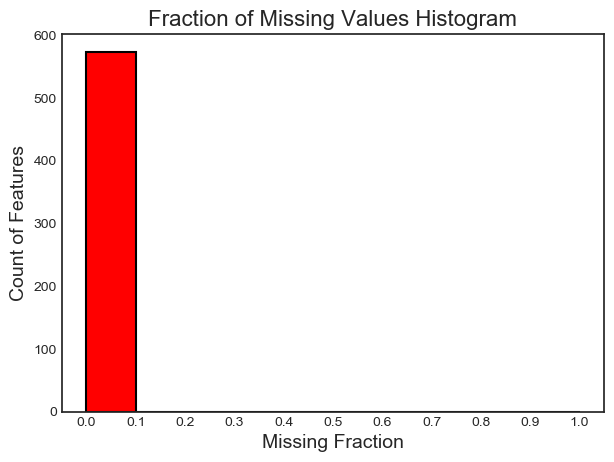

In [73]:
# No missing Valus
fs.plot_missing()

In [78]:
fs.identify_zero_importance(task = 'classification',
                           eval_metric = 'auc',
                           n_iterations = 10,
                           early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[951]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[479]	valid_0's auc: 0.999994
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[400]	valid_0's auc: 0.999965
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[634]	valid_0's auc: 0.999999
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[691]	valid_0's auc: 0.999999
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[634]	valid_0's auc: 0.999997
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[753]	valid_0's auc: 0.999997
Training until validation scores don't improve for 100 rounds.
D

In [79]:
# list of zero features
zero_importance_features = fs.ops['zero_importance']

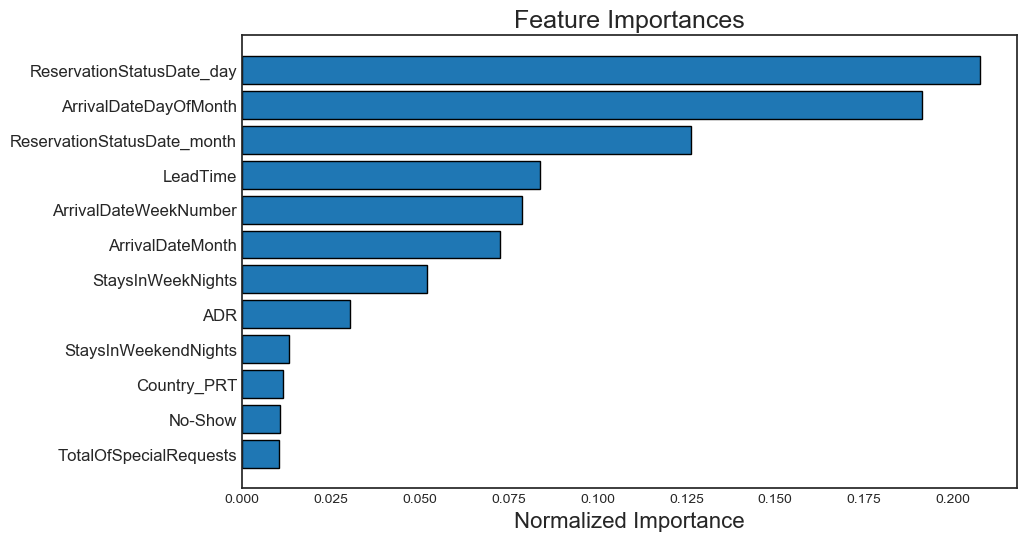

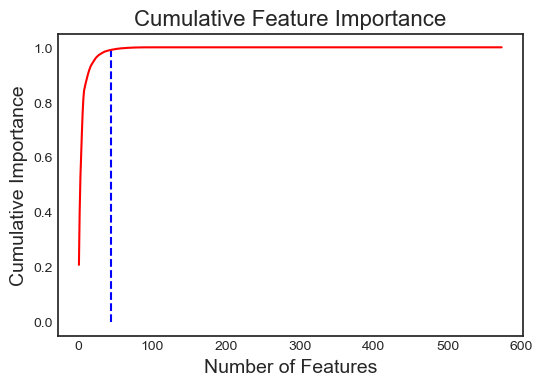

44 features required for 0.99 of cumulative importance


In [81]:
# plotting the feature importances
fs.plot_feature_importances(threshold=0.99, plot_n=12)

In [82]:
# identifying low importance features
fs.identify_low_importance(cumulative_importance=0.99)

43 features required for cumulative importance of 0.99 after one hot encoding.
530 features do not contribute to cumulative importance of 0.99.



In [83]:
fs.feature_importances.head(10)

feature  importance  normalized_importance  \
0    ReservationStatusDate_day      4334.2               0.207577   
1        ArrivalDateDayOfMonth      3995.1               0.191336   
2  ReservationStatusDate_month      2639.9               0.126432   
3                     LeadTime      1748.1               0.083721   
4        ArrivalDateWeekNumber      1647.5               0.078903   
5             ArrivalDateMonth      1516.1               0.072610   
6            StaysInWeekNights      1087.5               0.052083   
7                          ADR       636.2               0.030469   
8         StaysInWeekendNights       274.8               0.013161   
9                  Country_PRT       241.3               0.011557   

   cumulative_importance  
0               0.207577  
1               0.398913  
2               0.525345  
3               0.609066  
4               0.687969  
5               0.760580  
6               0.812663  
7               0.843132  
8               0.856293  
9               0.867850

In [84]:
# identify single unique value
fs.identify_single_unique()

32 features with a single unique value.



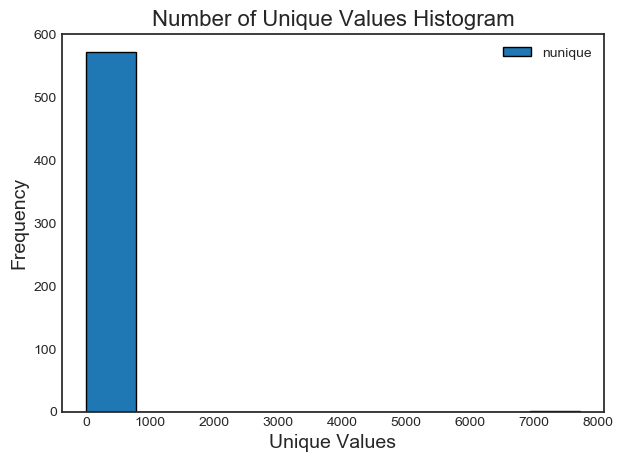

In [85]:
fs.plot_unique()

In [90]:
# Removing the features using all the above methods
X_train_new = fs.remove(methods='all')
X_train_new.head()

['missing', 'single_unique', 'zero_importance', 'low_importance'] methods have been run

Removed 529 features.


LeadTime  ArrivalDateYear  ArrivalDateMonth  ArrivalDateWeekNumber  \
40340        34             2015                12                     50   
19330       286             2016                10                     44   
10731       126             2016                 5                     20   
36540       138             2015                 7                     30   
36655        11             2016                12                     51   

       ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  \
40340                      8                     0                  2       1   
19330                     28                     0                  2       2   
10731                      8                     2                  0       2   
36540                     25                     0                  1       2   
36655                     17                     2                  1       1   

       IsRepeatedGuest  PreviousCancellations    ...      Country_PRT  \
40340                0                      1    ...                1   
19330                0                      0    ...                1   
10731                0                      0    ...                0   
36540                0                      0    ...                1   
36655                1                      5    ...                1   

       Transient  Transient-Party  Direct  TA/TO  Complementary  Direct  \
40340          1                0       0      1              0       0   
19330          1                0       0      1              0       0   
10731          1                0       1      0              0       1   
36540          0                1       0      1              0       0   
36655          1                0       0      0              0       0   

       Groups  Offline TA/TO  Online TA  
40340       0              1          0  
19330       1              0          0  
10731       0              0          0  
36540       1              0          0  
36655       0              0          0  

[5 rows x 41 columns]

In [122]:
s1 = set(X_train_new.columns)
s2 = set(X_test)

In [124]:
# checking for intersecting columns and keeping them
columns_to_keep = list(X_train_new.columns)
columns_to_keep = list(s2.intersection(set(columns_to_keep)))

In [125]:
# taking eqal number of features for both train and test
X_train_new = X_train_new[columns_to_keep]

In [126]:
rfc = RandomForestClassifier(criterion='entropy',
                            max_features='sqrt', n_estimators=500)

In [127]:
rfc.fit(X_train_new, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [128]:
# predicting values
pred_rfc = rfc.predict(X_test[columns_to_keep])

# plotting results
print(confusion_matrix(y_test, pred_rfc))

print(classification_report(y_test, pred_rfc))

[[18924   160]
 [  921  9843]]
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     19084
          1       0.98      0.91      0.95     10764

avg / total       0.96      0.96      0.96     29848



### PLOTLY PLOTTING

In [40]:
trace1 =go.Scatter(
                    x = data_h12['Adults'],
                    y = data_h12['StaysInWeekendNights'],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= data_h12['StaysInWeekendNights'])
data = [trace1]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [ ]:
trace1 =go.Scatter(
                    x = data_h12['Adults'],
                    y = data_h12['StaysInWeekendNights'],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= data_h12['StaysInWeekendNights'])
data = [trace1]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)